In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [14]:
path = "clean/"
file_1000 = "sessions_161718_top1000.csv"
file_top10 = "sessions_161718_95014_top10.csv"
file_tail10 = "sessions_161718_95014_tail10.csv"

In [15]:
sessions_1000 = pd.read_csv(path + file_1000, index_col=False)
sessions_top = pd.read_csv(path + file_top10, index_col=False)
sessions_tail = pd.read_csv(path + file_tail10, index_col=False)

print(len(sessions_1000))
print(len(sessions_top))
print(len(sessions_tail))

1139932
26614
10392


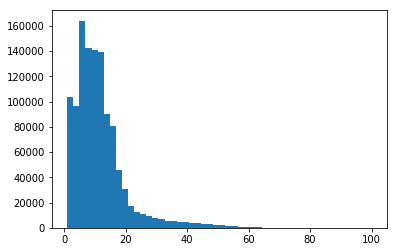

In [22]:
df = sessions_1000.copy(deep=True)
plot = plt.hist(df['Energy (kWh)'], bins=50)
plt.savefig('energy_1000.png', bbox_inches='tight')

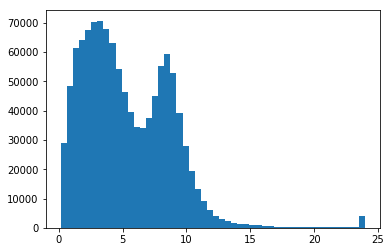

In [25]:
df = sessions_1000.copy(deep=True)
col = 'Session Time (secs)'
df[col] = df[col] /3600.0
plot = plt.hist(df[col], bins=50)
plt.savefig('duration_1000.png', bbox_inches='tight')

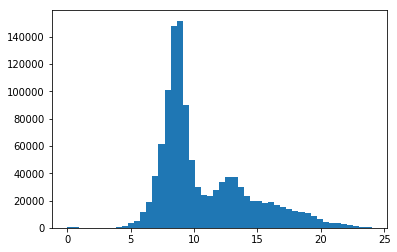

In [24]:
df = sessions_1000.copy(deep=True)
df['Station Start Time (Local)'] = df['Station Start Time (Local)'].apply(
        lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
col = 'time'
def to_seconds(x):
    return 60*60*x.hour + 60*x.minute + x.second
df[col] = df['Station Start Time (Local)'].apply(to_seconds)
df[col] = df[col] /3600.0

plot = plt.hist(df[col], bins=50)
plt.savefig('starttime_1000.png', bbox_inches='tight')